In [89]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import shapiro
import scipy
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import numpy as np
from scipy.stats import chi2_contingency
from scipy.stats import chi2

### Dataset import and changing space with underscore in column names

In [3]:
df = pd.read_csv("StudentsPerformance.csv")
df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.replace('/', '_')

### Basic exploration of the dataset, checking if its tidy, columns and data types in columms

In [23]:
df.head(10)


,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [7]:
print(df.dtypes)


gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object
['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'math score', 'reading score', 'writing score']


### First to check if there is any correlation with math score	/ reading score / writing score

Checking if data is normally distributed:

### Shapiro test (https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test)

The null-hypothesis of this test is that the population is normally distributed. Thus, if the p value is less than the chosen alpha level, then the null hypothesis is rejected and there is evidence that the data tested are not normally distributed. On the other hand, if the p value is greater than the chosen alpha level, then the null hypothesis that the data came from a normally distributed population can not be rejected (e.g., for an alpha level of .05, a data set with a p value of less than .05 rejects the null hypothesis that the data are from a normally distributed population).

In [28]:
print(shapiro(df.math_score))
print(shapiro(df.reading_score))
print(shapiro(df.writing_score))

(0.9931508302688599, 0.0001453401637263596)
(0.9929210543632507, 0.0001056220498867333)
(0.9919633269309998, 2.9172901122365147e-05)


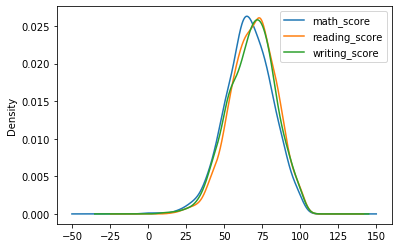

In [35]:
df.plot.kde()

Its strange how low P values from shapiro test indicate that its not normal distribution, even though visually from graphs it look like normal distribution. Maybe I'm not interpretting the results correctly. Perhaps the null and alternate hyphothases are swithced in scipy's Shapiro test.


### Checking distribution with Andersons test (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.anderson.html#scipy.stats.anderson)

Anderson-Darling test for data coming from a particular distribution.

The Anderson-Darling tests the null hypothesis that a sample is drawn from a population that follows a particular distribution. For the Anderson-Darling test, the critical values depend on which distribution is being tested against. This function works for normal, exponential, logistic, or Gumbel (Extreme Value Type I) distributions.

If the returned statistic is larger than these critical values then for the corresponding significance level, the null hypothesis that the data come from the chosen distribution can be rejected. 



In [41]:
print(scipy.stats.anderson(df.math_score, dist='norm'))
print(scipy.stats.anderson(df.reading_score, dist='norm'))
print(scipy.stats.anderson(df.writing_score, dist='norm'))

AndersonResult(statistic=0.6572122017591937, critical_values=array([0.574, 0.653, 0.784, 0.914, 1.088]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
AndersonResult(statistic=1.0211305184202502, critical_values=array([0.574, 0.653, 0.784, 0.914, 1.088]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
AndersonResult(statistic=1.447410803838352, critical_values=array([0.574, 0.653, 0.784, 0.914, 1.088]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


### Visualising normallity with probability plot 

In a normal probability plot (also called a "normal plot"), the sorted data are plotted vs. values selected to make the resulting image look close to a straight line if the data are approximately normally distributed. Deviations from a straight line suggest departures from normality. 

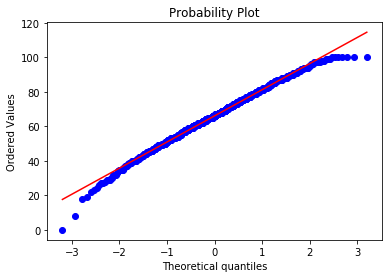

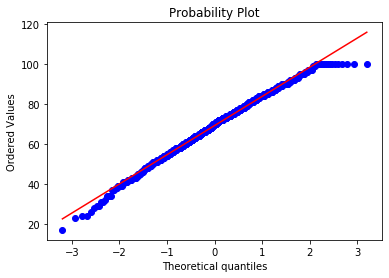

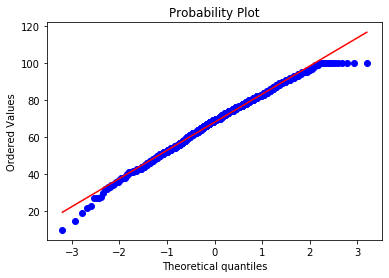

In [46]:
stats.probplot(df.math_score, dist="norm", plot=plt)
plt.show()
stats.probplot(df.reading_score, dist="norm", plot=plt)
plt.show()
stats.probplot(df.writing_score, dist="norm", plot=plt)
plt.show()



Looks decently straight with some outliers and the ends.

## Linear regression 

First to visually explore if there is some linear regression between scores and calculate parameters of linear regression

In [75]:
lr = LinearRegression().fit(x, y)

def linear_regression(predictor, response):
    
    x = df[predictor]
    y = df[response]
    
    #this command converts data to 2D array
    x = x.values.reshape(1000, 1)
    y = y.values.reshape(1000, 1)
    
    lr.fit(x, y)
    print(f"Coefficient: {lr.coef_}")
    print(f"Intercept: {lr.intercept_}")
    print(f"R squared: {lr.score(x, y)}")

#### Math and Reading

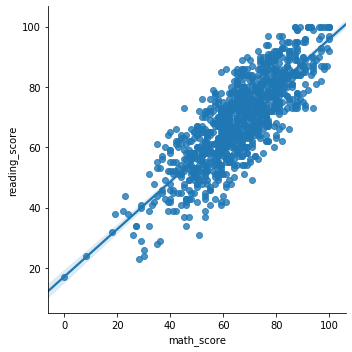

In [52]:
sns.lmplot(x= "math_score", y="reading_score", data=df)
plt.show()

In [76]:
linear_regression("math_score", "reading_score")

Coefficient: [[0.78722924]]
Intercept: [17.14180679]
R squared: 0.6684365064501091


#### Math and Writing

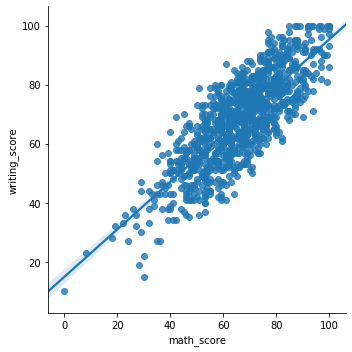

In [77]:
sns.lmplot(x="math_score", y="writing_score", data=df)
plt.show()

In [78]:
linear_regression("math_score", "writing_score")

Coefficient: [[0.80436647]]
Intercept: [14.89422427]
R squared: 0.6442342539264932


#### Reading and Writing

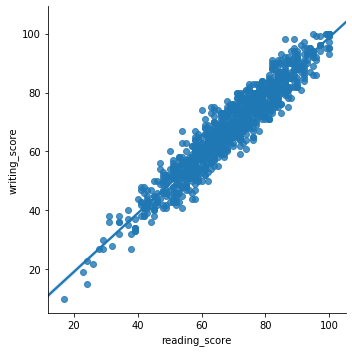

In [79]:
sns.lmplot(x="reading_score", y="writing_score", data=df)
plt.show()

To me, the last plot which compares writing and reading scores seems the best linear of the three, since points deviate the least. It is also logical to a degree, since reading and writing are related skills.

In [80]:
linear_regression("reading_score", "writing_score")

Coefficient: [[0.99353111]]
Intercept: [-0.66755364]
R squared: 0.9112574888913137


Here we confirm that writing and reading are most closely corellated since it has the highest coefficient of determination

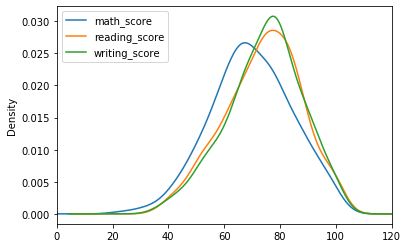

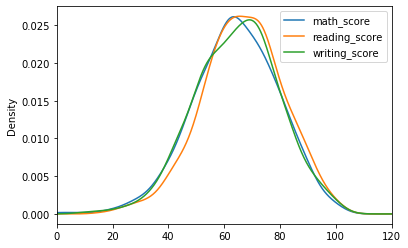

In [84]:
df[df.test_preparation_course == "completed"].plot.kde(xlim = (0,120))
df[df.test_preparation_course == "none"].plot.kde(xlim = (0,120))

I was intrested to see how the preparation course affected test results, its interesting how the peak of the curve indicates better test scores for the students who completed the preperation course. 

### Compare student race/ethincity and parental level of education with lunch type choice

The Pearson’s chi-squared statistical hypothesis is an example of a test for independence between categorical variables. First step in analyzing dependency of categorical variables (i.e. ones that have labels instead of numerical value) is to create a contingecy table.

#### Testing depencency of ethnicity and lunch choice 

In [90]:
table = pd.crosstab(df['race_ethnicity'], df['lunch'] )
table

lunch,free/reduced,standard
race_ethnicity,,
group A,36,53
group B,69,121
group C,114,205
group D,95,167
group E,41,99


The Chi-Squared test is a statistical hypothesis test that assumes (the null hypothesis) that the observed frequencies for a categorical variable match the expected frequencies for the categorical variable. 
We can interpret the test statistic in the context of the chi-squared distribution with the requisite number of degress of freedom as follows:

If Statistic >= Critical Value: significant result, reject null hypothesis (H0), dependent.

If Statistic < Critical Value: not significant result, fail to reject null hypothesis (H0), independent.

Degrees of freedom is calculated as (ncols - 1) * (nrows - 1)

In [91]:
stat, p, dof, expected = chi2_contingency(table)

In [95]:
print('dof=%d' % dof)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

dof=4
probability=0.950, critical=9.488, stat=3.442
Independent (fail to reject H0)
significance=0.050, p=0.487
Independent (fail to reject H0)


From the results of the chisq test we can deduce that variables ethnicity and lunch type are independent.

#### Testing depencency of parental education level and lunch choice 

In [96]:
table = pd.crosstab(df['parental_level_of_education'], df['lunch'] )
table

lunch,free/reduced,standard
parental_level_of_education,,
associate's degree,77,145
bachelor's degree,44,74
high school,70,126
master's degree,24,35
some college,79,147
some high school,61,118


In [97]:
stat, p, dof, expected = chi2_contingency(table)

In [98]:
print('dof=%d' % dof)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

dof=5
probability=0.950, critical=11.070, stat=1.111
Independent (fail to reject H0)
significance=0.050, p=0.953
Independent (fail to reject H0)


From the results of the chisq test we can deduce that parental education and lunch type are independent.